
# Project: Movie Database Investigation 
# Hollywood Motion Pictures - Profile of a Profitable Movie
![Hollywood sign](hollywood-sign.jpeg)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> We have movie dataset where we will investigate the data to develop a profitable movie profile. IE what parameters and values
characterize a profitable movie.  To do this, we'll answer two base questions through a series of data wrangling, cleaning
and exploration. 

In [1]:
# Set up - import libraries needed
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Load in file, check for cleanliness, IE missing entries, incomplete data, and duplicates.  We'll summarize
the results at the end of the Data Wrangling section and prepare for Data Cleaning

### General Properties

In [2]:
# Set the display option so we can scroll and seel all the columns to get an idea on what data we have
movies = pd.read_csv('tmdb-movies.csv')
pd.options.display.max_columns = None
movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
# Data Set Observations
# The expanded column view shows interesting columns to focus on:
# revenue and budget  - there is also and ajusted revenue and adjusted budget
# ## adjusted revenue and adjusted budget includes things like returns, bad debt, discounts, etc.  
# ## We'll use the adjusted versions
# popularity - not the same as highest rated
# vote count and vote average - this is more like a rating
# director - maybe directors did multiple movies

In [4]:
# Begin Data Wrangling Review

In [5]:
# Display basic summary so we get can column/row quantities
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# The movies database has 21 columns and 10866 entries. 
# We can see that now all rows have entries so there is missing data.

In [7]:
# Let's check for missing values
movies.isnull().values.any()

True

In [8]:
# movies.isnull assessment - this says yes, there are missing values. Next lets find out how many are missing
movies.isnull().sum().sum()

13434

In [9]:
# Check for movie duplicates
sum(movies.duplicated())

1

In [10]:
# movies duplciates assessment: 1 duplicate to remove in Data Cleaning

In [11]:
# Data Wrangling Summary:
# 1) movies has 1 duplicate value in the columns for various rows
# 2) movies has missing values 
# 3) Most data types we care about budget, revenue, popularity, vote_count, vote_average, budget_adj, revenue_adj seem fine
#    # we'll adjust budget_adj and revenue_adj to int64, they do not need to be float64
#    # we'll adjust release_date to a datetime

### Data Cleaning - Cleaning up the Red Carpet!
![Cleaning the red carpet](hollywood-cleaning.jpg)

In [12]:
# The Data Wranling section highlighed the issues with the initial data sets
# In this section, our Data Cleaning will include the following:
# 1) drop duplicates
# 2) delete any rows empty/zero values in a few select columns
# 3) we'll adjust budget_adj and revenue_adj to int64, they do not need to be float64
# 4) We'll adjust release_date to a datetime, it does not need to be a string object

In [13]:
# Data Cleaning for the movies dataframe
# drop duplicates
movies.drop_duplicates(keep='first', inplace=True)
sum(movies.duplicated())

0

In [14]:
# Data Cleaning for the movies dataframe
# remove rows with missing (zero's) data in the budget, revenue, budget_adj, revenue_adj columns
columnsToClean = ['budget', 'revenue', 'budget_adj', 'revenue_adj', 'vote_count']
movies[columnsToClean] = movies[columnsToClean].replace(0,np.NaN)
movies.dropna(subset=columnsToClean,inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 21 columns):
id                      3854 non-null int64
imdb_id                 3854 non-null object
popularity              3854 non-null float64
budget                  3854 non-null float64
revenue                 3854 non-null float64
original_title          3854 non-null object
cast                    3850 non-null object
homepage                1426 non-null object
director                3853 non-null object
tagline                 3574 non-null object
keywords                3716 non-null object
overview                3854 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null object
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
budget_adj              3854 non-null

In [15]:
# adjust budget, revenue, budget_adj and revenue_adj to int64, they do not need to be float64
movies['budget'] = movies['budget'].astype('int64')
movies['revenue'] = movies['revenue'].astype('int64')
movies['budget_adj'] = movies['budget_adj'].astype('int64')
movies['revenue_adj'] = movies['revenue_adj'].astype('int64')
# adjust release_date to a datetime
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 21 columns):
id                      3854 non-null int64
imdb_id                 3854 non-null object
popularity              3854 non-null float64
budget                  3854 non-null int64
revenue                 3854 non-null int64
original_title          3854 non-null object
cast                    3850 non-null object
homepage                1426 non-null object
director                3853 non-null object
tagline                 3574 non-null object
keywords                3716 non-null object
overview                3854 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null datetime64[ns]
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
budget_adj              3854 non-

In [16]:
# Get Profit and Adjusted Profit. Add to the DataFrame
profit = movies['revenue']-movies['budget']
profit_adj = movies['revenue_adj']-movies['budget_adj']
movies.insert(5,'profit',profit)
movies.insert(22,'profit_adj',profit_adj)
movies['profit'] = movies['profit'].astype('int64')
movies['profit_adj'] = movies['profit_adj'].astype('int64')
# lesson learned - the below two statements are intended to add appropriate commas to the numbers in profit
# and profit_adj for clarity.  But, having numbers with comma's impacts the integrity of the cells because now 
# we have a mix of numbers and strings.  So, probably better to change them to a currency if desired to show comma's.
# movies['profit'] = movies.apply(lambda x: "{:,}".format(x['profit']), axis=1)
# movies['profit_adj'] = movies.apply(lambda x: "{:,}".format(x['profit_adj']), axis=1)
movies.head(1)

,id,imdb_id,popularity,budget,revenue,profit,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,135397,tt0369610,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1254445953


In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 23 columns):
id                      3854 non-null int64
imdb_id                 3854 non-null object
popularity              3854 non-null float64
budget                  3854 non-null int64
revenue                 3854 non-null int64
profit                  3854 non-null int64
original_title          3854 non-null object
cast                    3850 non-null object
homepage                1426 non-null object
director                3853 non-null object
tagline                 3574 non-null object
keywords                3716 non-null object
overview                3854 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null datetime64[ns]
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-

In [18]:
# Data Cleaning Results
# dropped duplicates
# delete any rows empty/zero values in a few select columns
# changed data types as noted
# added profit and profit_adj columns
# Data is trimmed and clean !

<a id='eda'></a>
## Exploratory Data Analysis

> Data is trimmed and cleaned, now we explore.  We'll step through different columns/variables to find the strongest
column or columns relationship with adjusted profit.  Adjusted profit is a new column created and added to the 
dataset in the Data Cleaning section.

### Research Question 1 - Which columns have the strongest quantitative relationship with adjusted profit?

In [19]:
# Movie Exploratory Data Analysis
# Which columns/variables have the strongest positive relationship with profit_adj ?

In [20]:
movies.corr()

,id,popularity,budget,revenue,profit,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
id,1.000000,0.188878,-0.027449,-0.003206,0.003934,-0.035688,0.111470,-0.001269,0.489926,-0.124035,-0.088287,-0.069675
popularity,0.188878,1.000000,0.446987,0.615535,0.596201,0.215092,0.780096,0.317866,0.173278,0.399356,0.546959,0.516868
budget,-0.027449,0.446987,1.000000,0.688556,0.526818,0.260977,0.556937,0.024169,0.268040,0.958520,0.533498,0.372772
revenue,-0.003206,0.615535,0.688556,1.000000,0.979133,0.250298,0.754567,0.227123,0.139140,0.657567,0.900882,0.851366
profit,0.003934,0.596201,0.526818,0.979133,1.000000,0.220238,0.728348,0.259435,0.087971,0.502119,0.906411,0.893414
runtime,-0.035688,0.215092,0.260977,0.250298,0.220238,1.000000,0.273771,0.351712,-0.112453,0.333976,0.280505,0.235249
vote_count,0.111470,0.780096,0.556937,0.754567,0.728348,0.273771,1.000000,0.387210,0.207191,0.497970,0.654688,0.614062
vote_average,-0.001269,0.317866,0.024169,0.227123,0.259435,0.351712,0.387210,1.000000,-0.134246,0.036803,0.266844,0.288651
release_year,0.489926,0.173278,0.268040,0.139140,0.087971,-0.112453,0.207191,-0.134246,1.000000,0.075103,-0.103147,-0.132202
budget_adj,-0.124035,0.399356,0.958520,0.657567,0.502119,0.333976,0.497970,0.036803,0.075103,1.000000,0.570451,0.404344


In [21]:
# For adjusted profit, or profit_adj, the "best" correlation, outside of budget and revenue which comprise the profit, 
# is runtime, popularity, vote_average, and vote_count. These 4 columns will be investigated further to find a
# a deeper relationship with adjusted profit (IE profit_adj). 

In [22]:
# Runtime - Exploratory Analysis

In [23]:
movies['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

In [24]:
# The internal quartile percents between 25% and 75% shows a range of 95 to 119 minutes.

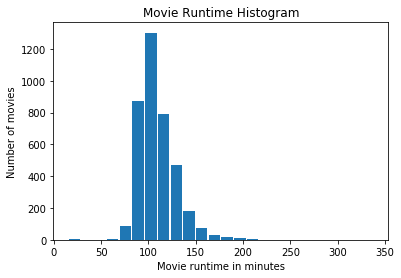

In [25]:
plt.xlabel("Movie runtime in minutes")
plt.ylabel("Number of movies")
plt.title("Movie Runtime Histogram")
plt.hist(movies['runtime'], rwidth=0.9, bins=24)
plt.show()

In [26]:
# The histogram confirms the inter-quartile 25% to 75% with a range of 95 to 119 minutes.

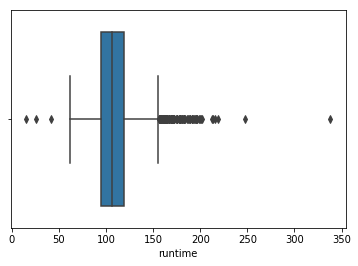

In [27]:
# movies.boxplot(column='runtime')
sns.boxplot(movies['runtime'])
plt.show()

In [28]:
profit_per_run_time = movies.groupby('runtime')['profit_adj'].sum()
# This groups the adjusted profit based on the movie runtime and summarizes the adjusted profit per runtime

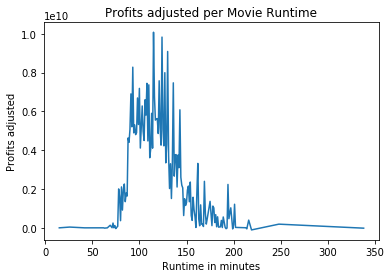

In [29]:
plt.xlabel('Runtime in minutes')
plt.ylabel('Profits adjusted')
plt.title("Profits adjusted per Movie Runtime")
plt.plot(profit_per_run_time)
plt.show()
# sns.regplot(x=movies["runtime"], y=movies["profit_adj"])

In [30]:
# The above line shows that movies outside the 25% to 75% inter-quartile range are not as profitable
# as those within the 25% to 75% runtime range.
# Our profitability relationship with runtime is from 95 to 119 minutes.

In [31]:
# Popularity - Exploratory Analysis

In [32]:
movies['popularity'].describe()

count    3854.000000
mean        1.191554
std         1.475162
min         0.001117
25%         0.462368
50%         0.797511
75%         1.368324
max        32.985763
Name: popularity, dtype: float64

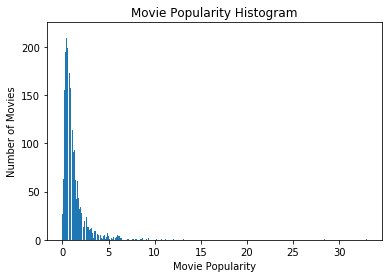

In [33]:
plt.xlabel("Movie Popularity")
plt.ylabel("Number of Movies")
plt.title("Movie Popularity Histogram")
plt.hist(movies['popularity'], rwidth=0.9, bins=500)
plt.show()

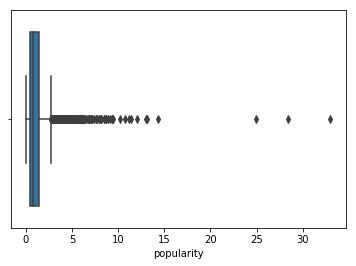

In [34]:
sns.boxplot(movies['popularity'])
plt.show()

In [35]:
profit_per_popularity = movies.groupby('popularity')['profit_adj'].sum()

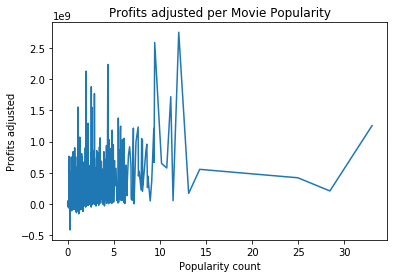

In [36]:
plt.xlabel('Popularity count')
plt.ylabel('Profits adjusted')
plt.title("Profits adjusted per Movie Popularity")
plt.plot(profit_per_popularity)
plt.show()

In [37]:
# The popularity profitability graph is difficult to draw any conclusions.  We do see a slight uptrend as the popularity count
# increase, we see profits adjusted rise.

In [38]:
# vote average - Exploratory Analysis

In [39]:
movies['vote_average'].describe()

count    3854.000000
mean        6.168163
std         0.794920
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

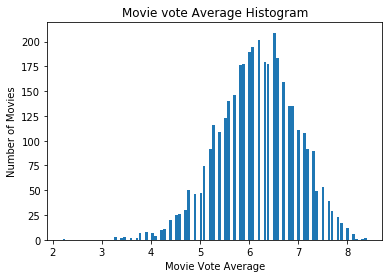

In [40]:
plt.xlabel("Movie Vote Average")
plt.ylabel("Number of Movies")
plt.title("Movie vote Average Histogram")
plt.hist(movies['vote_average'], rwidth=0.9, bins=100)
plt.show()

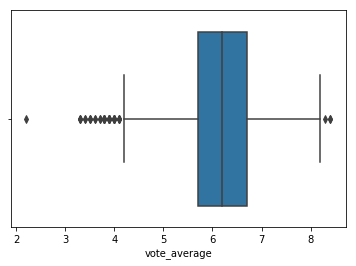

In [41]:
sns.boxplot(movies['vote_average'])
plt.show()

In [42]:
profit_per_vote_average = movies.groupby('vote_average')['profit_adj'].sum()

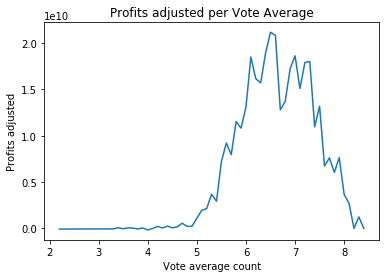

In [43]:
plt.xlabel('Vote average count')
plt.ylabel('Profits adjusted')
plt.title("Profits adjusted per Vote Average")
plt.plot(profit_per_vote_average)
plt.show()

In [44]:
# The vote average profitability graph shows an even distribution.  We see the the best profit adjusted between 6 and 7.25
# on the vote average count (x-axis).  Interestingly, we see profits_adj decrease after 7.25 - perhaps this is because these
# movies are less "commercial" in nature. 

In [45]:
# vote count - Exploratory Analysis

In [46]:
movies['vote_count'].describe()

count    3854.000000
mean      527.720291
std       879.956821
min        10.000000
25%        71.000000
50%       204.000000
75%       580.000000
max      9767.000000
Name: vote_count, dtype: float64

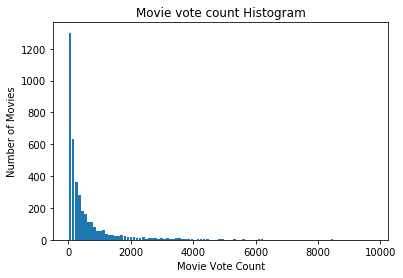

In [47]:
plt.xlabel("Movie Vote Count")
plt.ylabel("Number of Movies")
plt.title("Movie vote count Histogram")
plt.hist(movies['vote_count'], rwidth=0.9, bins=100)
plt.show()

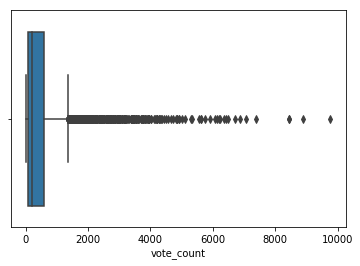

In [48]:
sns.boxplot(movies['vote_count'])
plt.show()

In [49]:
profit_per_vote_count = movies.groupby('vote_count')['profit_adj'].sum()

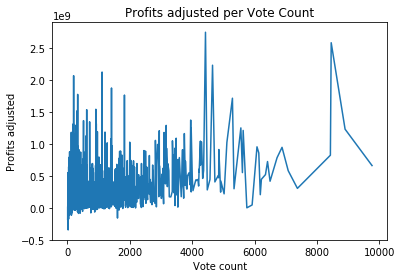

In [50]:
plt.xlabel('Vote count')
plt.ylabel('Profits adjusted')
plt.title("Profits adjusted per Vote Count")
plt.plot(profit_per_vote_count)
plt.show()

In [51]:
# The vote count profitability graph shows a slight upward trend as the vote counts increase, the movie profitability increases.
# This slight uptrend is similar to the slight uptrend in profit adjusted as the population graph. 

In [52]:
# Overall, we see the strongest indicators of high adjusted profit when the movie runtime is between
# 95 and 119 minutes and with a voter average between 6 and 7.25.

### Research Question 2  - Who are the most profitable directors?

In [53]:
# Who are the most profitable Directors

In [54]:
# We will walk through creating new dataframes using groupby to find the following:
# directorAverages - profit adjusted
# moviesDirector10 - top 10 directors in terms of number of movies
# directorProfit10 - top 10 directors in terms of total adjusted profit
# avgProfit10 - top 10 directors in terms of average adjusted profit

In [55]:
movieDirectors = movies.groupby('director')
directorAverages = movieDirectors.mean()

In [56]:
directorAverages['profit_adj'].nlargest(10)

director
Irwin Winkler                                        1.551568e+09
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman    1.545635e+09
Richard Marquand                                     1.182995e+09
Roger Allers|Rob Minkoff                             1.093392e+09
Chris Buck|Jennifer Lee                              1.052306e+09
Kyle Balda|Pierre Coffin                             9.961120e+08
George Lucas                                         9.740265e+08
Andrew Stanton|Lee Unkrich                           9.134635e+08
Andrew Adamson|Kelly Asbury|Conrad Vernon            8.887368e+08
Lee Unkrich                                          8.631719e+08
Name: profit_adj, dtype: float64

In [57]:
# The averaged adjusted profit leaders are above. I recognize only George Lucas and clearly Star Wars is his main
# contributor to his average profit.

In [58]:
# results is the directors profits
# moviesDirectorCount is the number of movies by the directors
# below is another way to get average profits per director, this is a way to compare and confirm results.

In [59]:
avgProfits = movies.groupby('director')
results = avgProfits['profit_adj'].agg(np.average)
results = results.to_frame().reset_index()
results = results.sort_values(by=['profit_adj'],ascending=False)
avgProfit10 = results.head(10)
print(avgProfit10)

                                               director    profit_adj
620                                       Irwin Winkler  1.551568e+09
273   Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman  1.545635e+09
1318                                   Richard Marquand  1.182995e+09
1388                           Roger Allers|Rob Minkoff  1.093392e+09
227                             Chris Buck|Jennifer Lee  1.052306e+09
931                            Kyle Balda|Pierre Coffin  9.961120e+08
541                                        George Lucas  9.740265e+08
77                           Andrew Stanton|Lee Unkrich  9.134635e+08
61            Andrew Adamson|Kelly Asbury|Conrad Vernon  8.887368e+08
952                                         Lee Unkrich  8.631719e+08


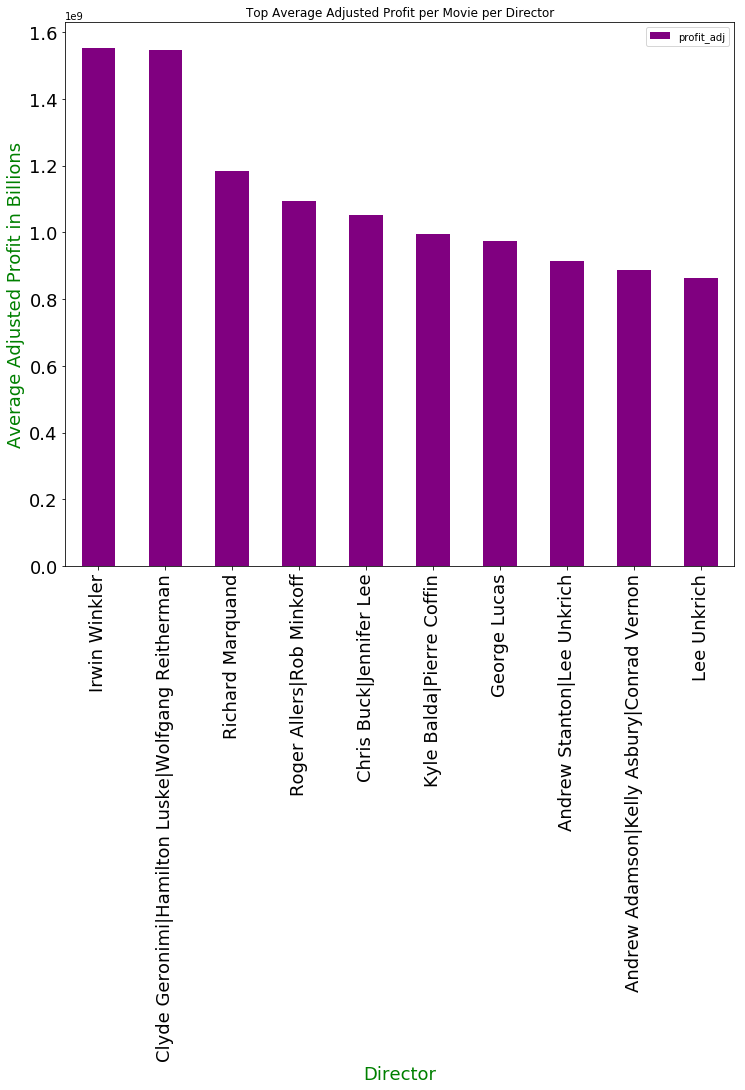

In [60]:
ax = avgProfit10.plot.bar(color='Purple', fontsize = 18)
ax.set(title='Top Average Adjusted Profit per Movie per Director')
ax.set_xlabel("Director", color='g',fontsize = '18')
ax.set_ylabel("Average Adjusted Profit in Billions", color='g',fontsize='18')
ax.set_xticklabels(avgProfit10.director, rotation=90)
ax.figure.set_size_inches(12,10)
plt.show()

In [61]:
# Now, we'll get the top 10 directors in terms of number of films directed.  
moviesDirectorCount = movies['director'].value_counts()
moviesDirectorCount = moviesDirectorCount.to_frame().reset_index()
moviesDirectorCount.rename(columns={'index':'name'},inplace=True)
moviesDirector10 = moviesDirectorCount.head(10)
moviesDirector10.head(10)

,name,director
0,Steven Spielberg,27
1,Clint Eastwood,24
2,Ridley Scott,21
3,Woody Allen,18
4,Steven Soderbergh,17
5,Martin Scorsese,17
6,Tim Burton,16
7,Brian De Palma,15
8,Renny Harlin,15
9,Robert Zemeckis,15


In [62]:
# These directors are a bit more familiar than the directors for average profit. 
# We may suspect that directors that have a lot of movies credits is because they are very profitable.  We'll see...

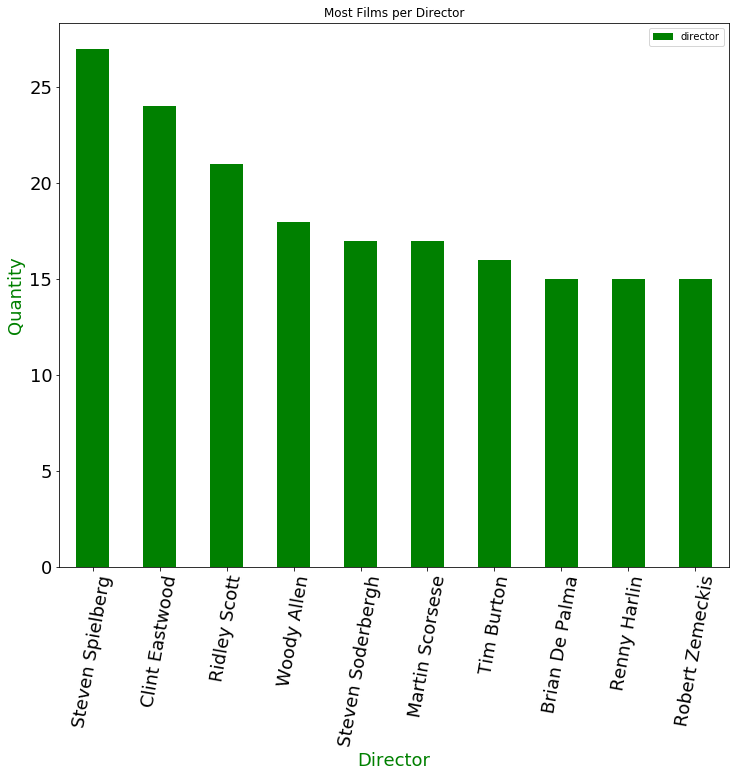

In [63]:
ax = moviesDirector10.plot.bar(color='g', fontsize = 18)
ax.set(title='Most Films per Director')
ax.set_xlabel("Director", color='g',fontsize = '18')
ax.set_ylabel("Quantity", color='g',fontsize='18')
ax.set_xticklabels(moviesDirector10.name, rotation=80)
ax.figure.set_size_inches(12,10)
plt.show()

In [64]:
# Here, we'll see the top 10 directors in terms of total adjusted profit. 
# As in the case of the number of films directed, we see Steven Spielberg at the top of the list in total 
# adjusted profit.
directorsProfits = movies.groupby('director')
results = directorsProfits['profit_adj'].agg(np.sum)
results = results.to_frame().reset_index()
results = results.sort_values(by=['profit_adj'],ascending=False)
directorProfit10 = results.head(10)
print(directorProfit10)

               director   profit_adj
1548   Steven Spielberg  13126025232
643       James Cameron   6296578359
541        George Lucas   5844159209
1242      Peter Jackson   5645491691
1377    Robert Zemeckis   4335995167
229      Chris Columbus   4171046474
1068        Michael Bay   3958675887
381         David Yates   3394430108
1596         Tim Burton   3200595270
260   Christopher Nolan   3149568381


In [65]:
# These directors have the greatest overall volume of profits adjusted. IE size, largest, most.
# notice how this director list is different than the average adjusted profit. 

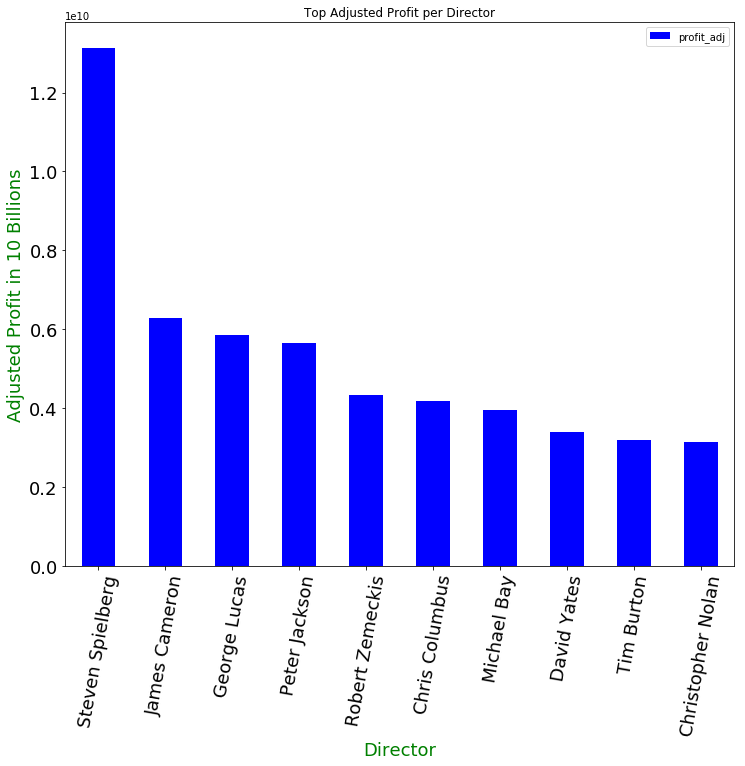

In [66]:
ax = directorProfit10.plot.bar(color='blue', fontsize = 18)
ax.set(title='Top Adjusted Profit per Director')
ax.set_xlabel("Director", color='g',fontsize = '18')
ax.set_ylabel("Adjusted Profit in 10 Billions", color='g',fontsize='18')
ax.set_xticklabels(directorProfit10.director, rotation=80)
ax.figure.set_size_inches(12,10)
plt.show()

In [67]:
# In terms of number of adjusted profit per director, Steven Spielberg is the most prolific and we also see Steven
# Spielberg lead with the most films directed.  But, George Lucas is the only director among the leaders in the 
# adjusted profit and the average adjusted profit tables.  

### Data Exploration - George Lucas is the only director in both the most profitable and hightest average profitable director categories.
![George Lucas](george-lucas-star-wars.jpg)

<a id='conclusions'></a>
## Conclusions

> This movie analysis report focused on finding the metrics that best align with profitability (adjusted) for a movie.  Although it is not intended to be a movie profitability predictor, you can get a sense of the parameters within this dataset that
can identify profitable movies.
> Our examination shows that movies with a runtime range of 95 to 119 minutes and with voter average scores in the range of 6
to 7.25 have the highest adjusted profit returns. 
> Further examination into the director information showed that the only director in the top 10 of total profits and average profits per movie is George Lucas.
> Based on this dataset and the existing examination, we conclude that the most profitable movie profile includes:
1. Directed by George Lucas
2. Have a runtime between 95 and 119 minutes
3. Receive an average voter score betweeen 6 and 7.25.

> The data analysis does have limitations that may have had an impact on the results: 
1. Rows with missing budget, revenue, budget_adj, revenue_adj data were removed. It is uncertain how removing rows impacted results  - 7012 rows were deleted out of 10866 (approx. 64.5%) but it did increase the integrity of the data.  All columns with numeric data had the same number of data-filled rows.
2. The remaining rows included all numeric fields with data, increasing the data integrity of the revised data set and associated calculations. However, since approx. 64.5% of the rows were eliminated, it must be noted that more complete data is required for deeper investigations. 
3. The director profitability section did not credit individual directors when multiple directors were credited for a movie. This means directors that partnered with other directors and had significant profitability success, were not credited to their individual results. Future efforts should dig deeper into movies that have multiple directors credited.
4. The final analysis noted that a profitable movie profile includes a runtime between 95 and 119 minutes, a voter score between 6 and 7.25 and directed by George Lucas.  This profitability profile is a correlation and not a causation. We cannot predict and therefore there is no causation that if the director is George Lucas, the movie has a runtime of 100 minutes, and receives an average score of 7.0, that it will be profitable. However, our data analysis does find a correlation with these variables and deeper investigation should be pursued to find any causal relationship. 

